<a href="https://colab.research.google.com/github/Mezirix/AIDA-Saskpoly/blob/main/6_Decision_Tree_Classification_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Decision Tree Classifier </center>  

***

In the context of decision trees, Gini index and information gain are criteria used for selecting the best attribute to split the data at each node.

# Gini Index:

Gini index measures the impurity of a set of data points. It ranges from 0 to 1, where 0 indicates pure (all data points belong to the same class) and 1 indicates maximum impurity (data points are evenly distributed across different classes).
In the context of decision trees, the Gini index is used to evaluate the impurity of a node. A lower Gini index suggests a more homogeneous set of data points at that node.

# Information Gain:

Information gain is a metric that quantifies the effectiveness of an attribute in reducing uncertainty (entropy) about the class labels of the data.
Decision trees use information gain to decide which attribute to split on at each node. It calculates the difference in entropy (uncertainty) before and after the split. Higher information gain indicates a better attribute for splitting the data.

## In summary, while Gini index focuses on impurity reduction directly, information gain assesses the reduction in uncertainty about class labels. Both metrics are used to guide the decision tree algorithm in selecting the most informative attributes for creating splits and building an effective classification model.

## <center> Diabetes Prediction </center>

---


### Introduction

**Goal:** Build a system to predict diabetes using Decision Tree Classifier Algorithm  
**Learning Type:** Supervised  
**Problem Type:** Binary Classification  

---

### Datasets
**Data Source:** Kaggle    
**Data Nature:** Labeled  

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [8]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
pd_2 = pd.read_csv("/content/drive/MyDrive/ML Data/diabetes.csv", header=None)
pd_2

,0,1,2,3,4,5,6,7,8
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [13]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("/content/drive/MyDrive/ML Data/diabetes.csv", header=None, names=col_names)
pima = pima.iloc[1:]
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'skin','age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable
X.head()

,pregnant,insulin,bmi,skin,age,glucose,bp,pedigree
1,6,0,33.6,35,50,148,72,0.627
2,1,0,26.6,29,31,85,66,0.351
3,8,0,23.3,0,32,183,64,0.672
4,1,94,28.1,23,21,89,66,0.167
5,0,168,43.1,35,33,137,40,2.288


In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)





Feature: 0, Score: 0.06247
Feature: 1, Score: 0.05644
Feature: 2, Score: 0.17661
Feature: 3, Score: 0.07503
Feature: 4, Score: 0.11674
Feature: 5, Score: 0.26743
Feature: 6, Score: 0.14233
Feature: 7, Score: 0.10294


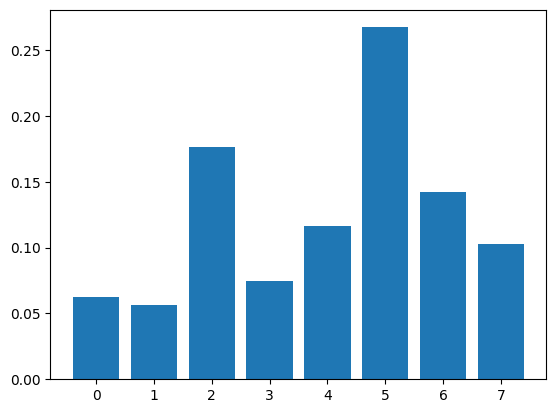

In [17]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [18]:
#Predict the response for test dataset

y_pred = clf.predict(X_test)

In [ ]:
y_pred

array(['0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1',
       '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0',
       '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0',
       '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1',
       '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1

In [19]:
y_train.shape,X_train.shape

((537,), (537, 8))

In [20]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.70995670995671


In [21]:
X.head()

,pregnant,insulin,bmi,skin,age,glucose,bp,pedigree
1,6,0,33.6,35,50,148,72,0.627
2,1,0,26.6,29,31,85,66,0.351
3,8,0,23.3,0,32,183,64,0.672
4,1,94,28.1,23,21,89,66,0.167
5,0,168,43.1,35,33,137,40,2.288


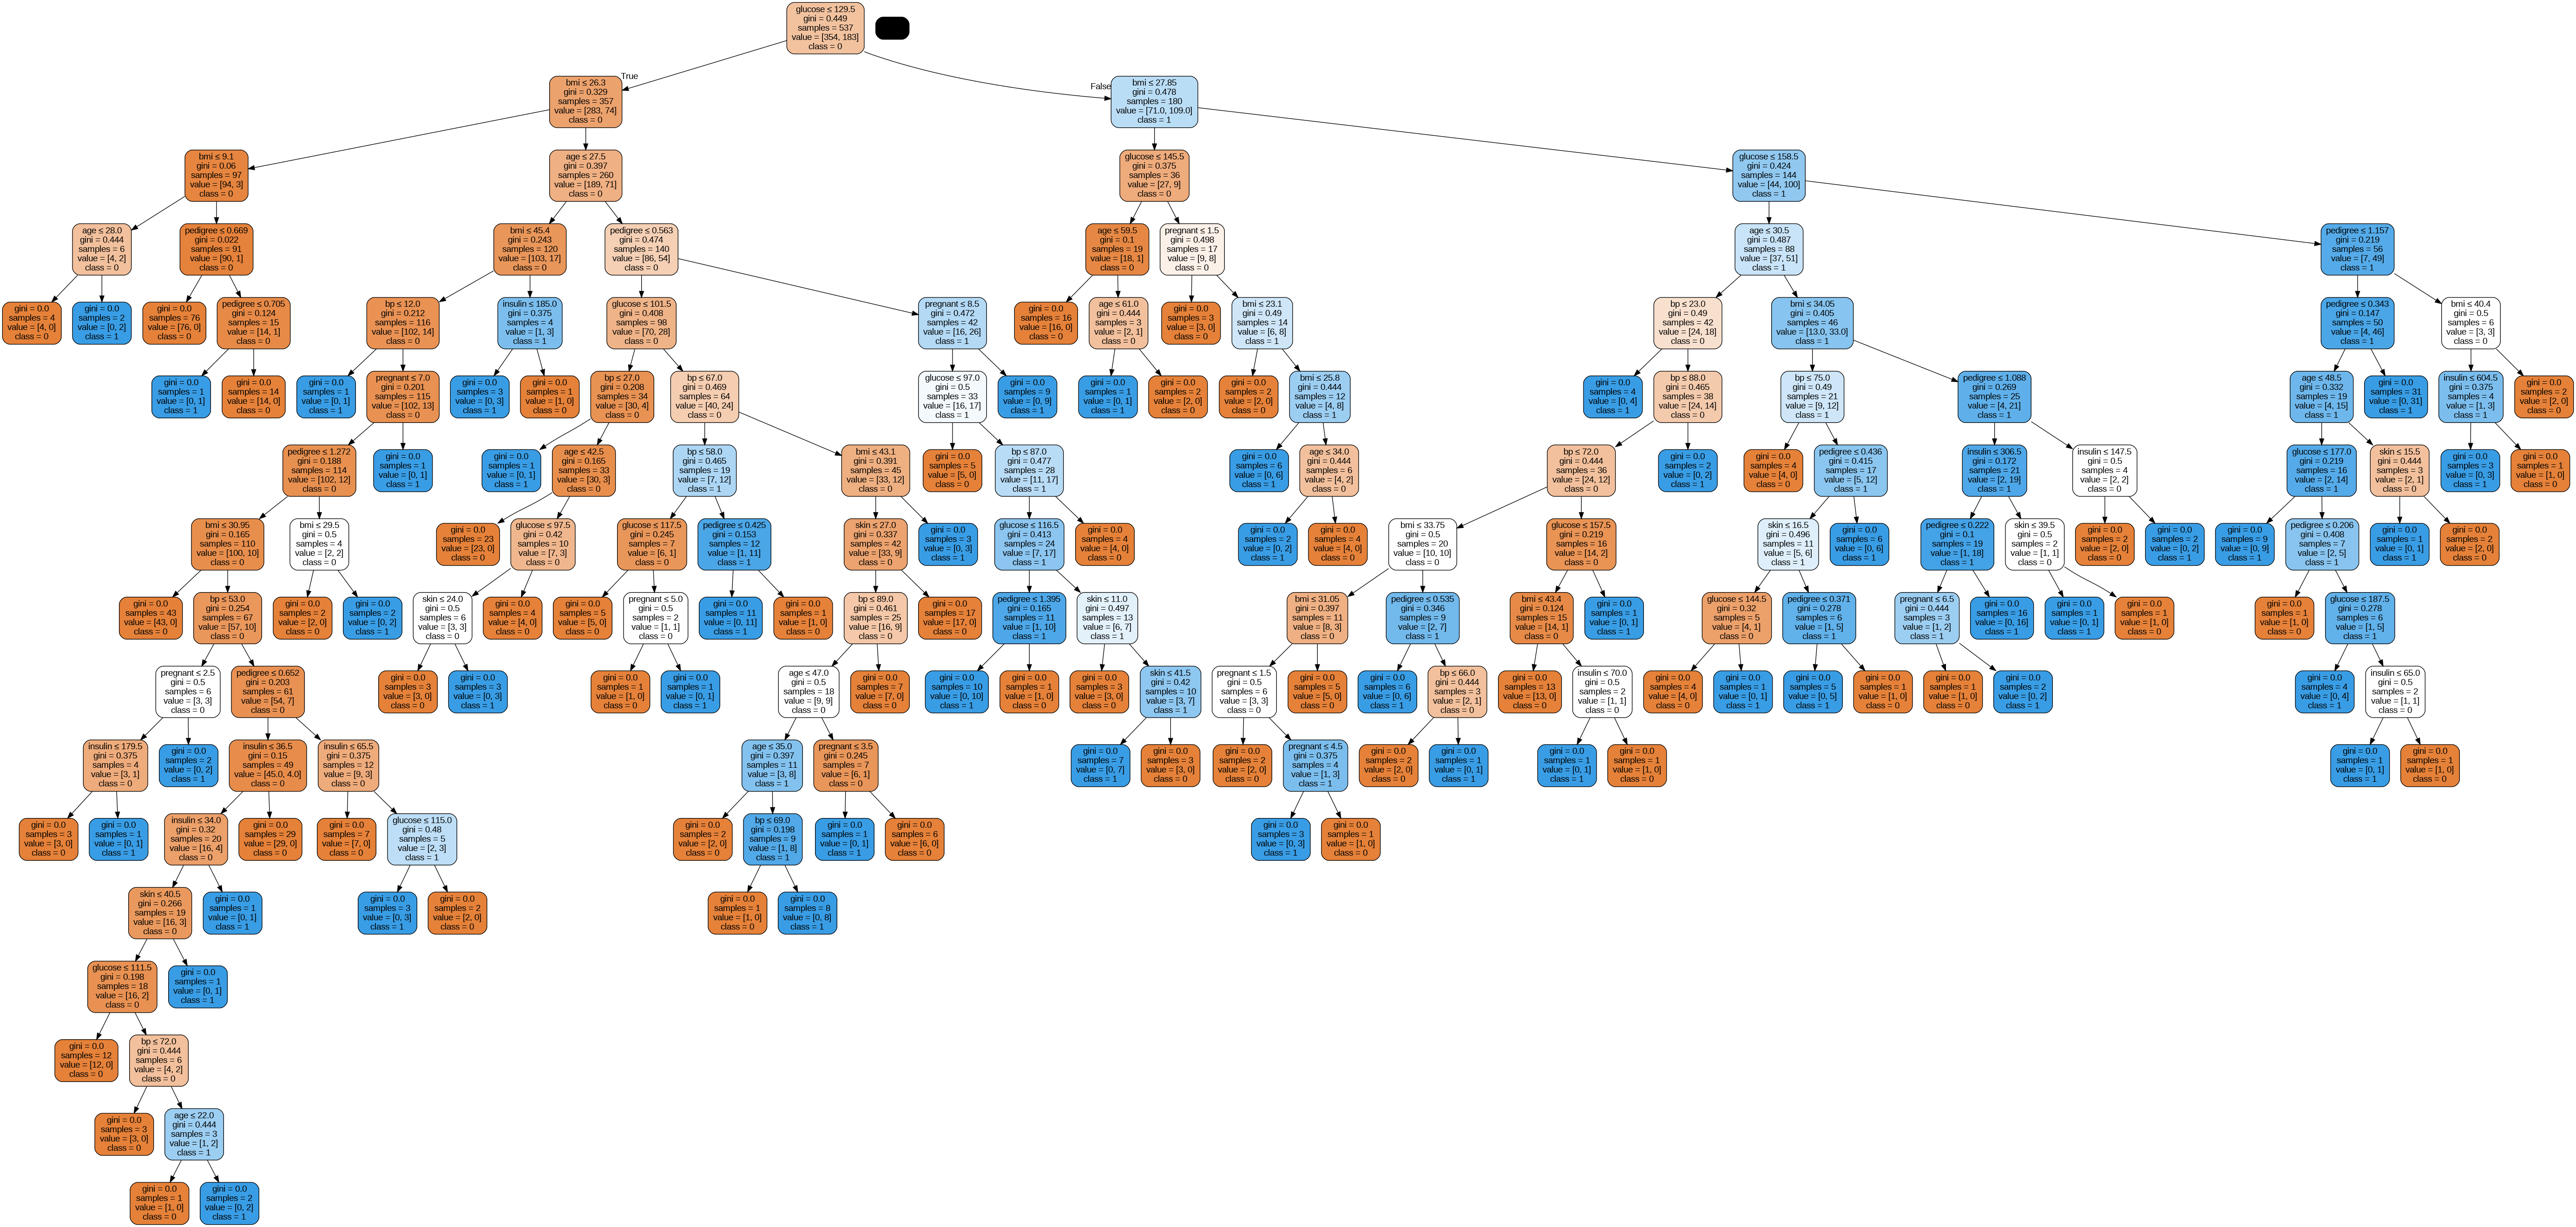

In [22]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


# Writing Decision Tree from scratch

Get the data

In [24]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
data = pd.read_csv("/content/drive/MyDrive/ML Data/diabetes.csv", header=None, names=col_names)
# data = pd.read_csv("diabetes.csv", header=None, names=col_names)
data.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


Node class


In [25]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

Tree class

In [27]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")

        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        ''' function to compute entropy '''

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        ''' function to compute gini index '''

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        Y = list(Y)
        return max(Y, key=Y.count)

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        ''' function to predict new dataset '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

Split data

In [28]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)


Fit the model




In [29]:
import numpy as np
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_1 <= 199 ? 0.04847908589449007
 left:X_1 <= 154 ? 0.07554654785457043
  left:X_5 <= 26.2 ? 0.03876434915751986
    left:X_7 <= 53 ? 0.007988970726778927
        left:0
        right:0
    right:X_0 <= 6 ? 0.026241934673249923
        left:0
        right:1
  right:X_2 <= 92 ? 0.030329762654904446
    left:X_4 <= 543 ? 0.029172350778776418
        left:1
        right:0
    right:0
 right:X_6 <= 0.773 ? 0.018048386419908496
  left:X_4 <= 95 ? 0.012902484065906591
    left:X_7 <= 42 ? 0.0044205570268818495
        left:0
        right:0
    right:1
  right:X_6 <= 0.926 ? 0.20222222222222225
    left:1
    right:X_2 <= 76 ? 0.1694444444444445
        left:0
        right:Outcome


test the model

In [30]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.7402597402597403

class exercise: your objective is build a system to predict the quality of wine using Decision Tree Classifier Algorithm. (data: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)
